In [1]:
# https://towardsdatascience.com/reinforcement-learning-explained-visually-part-6-policy-gradients-step-by-step-f9f448e73754/

### __Policy Gradients__

optimal policy를 directly하게 학습하는 신경망을 구축하면, state를 input으로 받아 모든 actions에 대한 Q-values을 출력하는 function을 학습하는 대신, 그 state에서 취해야 할 best action 자체를 출력하는 function을 학습시킬 수 있다.

더 정확하게는, 단 하나의 best action을 출력하는 것이 아니라, 그 state에서 취할 수 있는 actions의 확률분포를 출력하게 한다. 그 후 이 확률분포에서 샘플링을 통해 수행할 action을 선택하게 한다.

이렇게 하면 Q 값을 몰라도 된다. 신경망을 통해 action을 결정하기 때문이다.

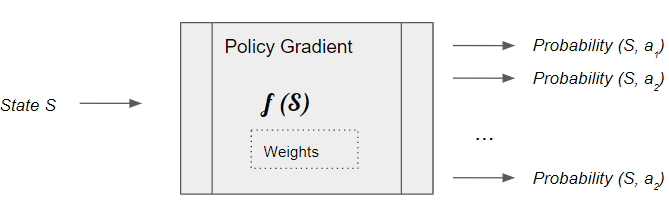
- 그림에서 볼 수 있듯이, 신경망이 state를 input으로 받아 그 state에서 가능한 actions에 대한 확률분포를 출력한다.

### __Architecture Components__

policy network는 optimal policy를 예측하도록 학습되는 neural network architecture이다.

만약 state가 일련의 숫자 변수들로 표현된다면 hidden layers이 몇 개 있는 단순한 linear network가 될 수 있다.

혹은 state data가 이미지나 텍스트라면, CNN이나 RNN architecture를 사용할 수도 있다.

training data는 environment와 상호작용하면서 actual experience으로부터 수집되며, 관측된 results이 저장된다.

experience의 각 episode가 저장되며, 각 샘플은 (state, action, reward) tuple로 구성된다.

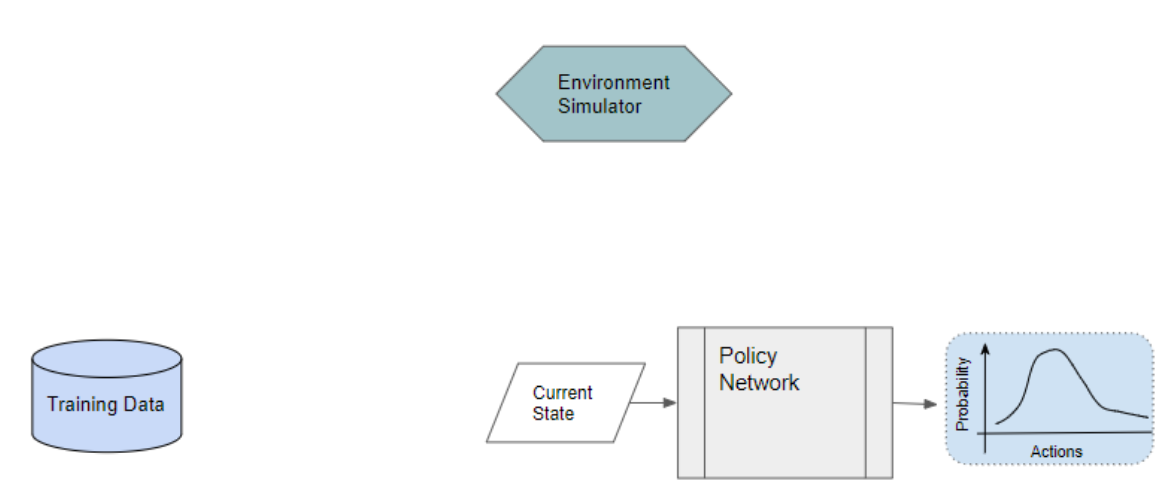
- environment 상호작용 -> data 수집 -> network 업데이트
- agent로 environment에서 행동해 보며 data를 수집한다.
-  (state, action, reward) tuple로 구성된 training data를 수집해서, 이 data를 사용하여 reward가 컸던 action은 확률을 높이고, reward가 작았던 action은 확률을 낮추는 방향으로 network를 업데이트한다.

### __Workflow__

policy gradient는 여러 epochs에 걸쳐 학습된다. 각 epoch는 두 가지 phase로 구성된다.
- (1) first phase: episode 동안 environment와 상호작용하며 (state, action, reward) 형태의 training data 수집한다.
- (2) second phase: (1)에서 수집한 training data를 사용하여 policy network를 학습시킨다.
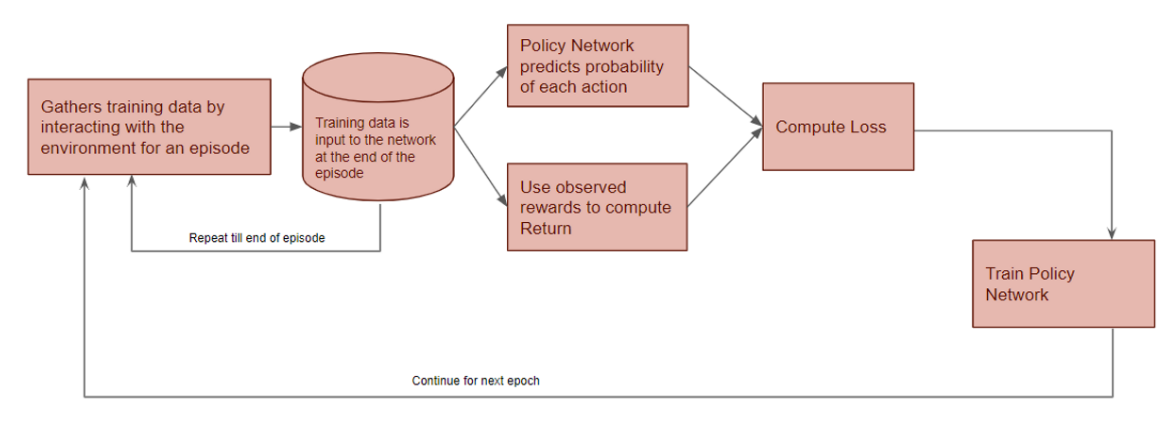

#### (1) first phase: training data 수집
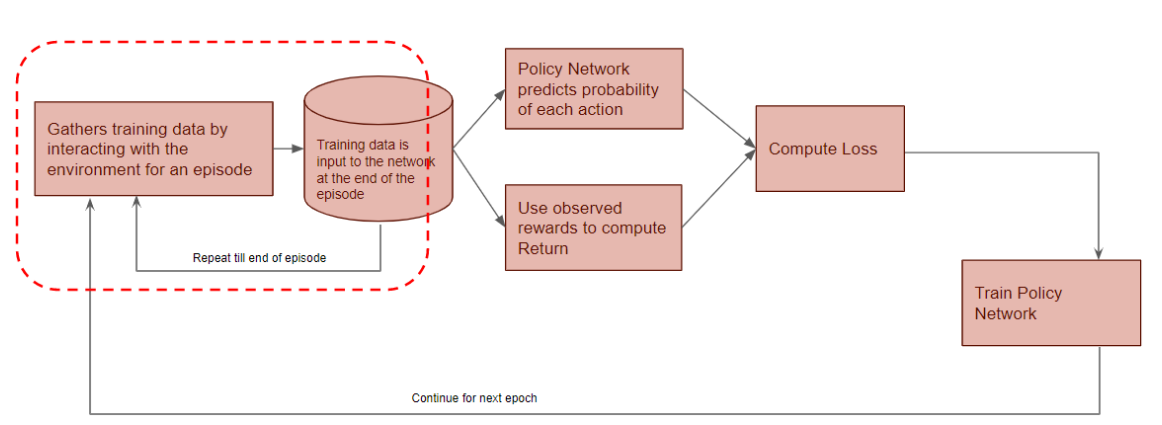
- policy network는 agent 역할을 하며, episode 동안 environment와 상호작용한다.
- current state로부터 policy network는 취할 수 있는 actions의 확률분포를 예측한다.
- 그런 다음, 이 확률분포에서 action을 샘플링하여 environment에서 실행하고, 그 결과로 reward와 next state를 받는다.
- 각 observation을 training data의 샘플로 저장한다.
- __중요한 것은, 이 단계 동안 policy network는 fixed되어 있으며, 학습되지 않는다.__
- 즉, 이 페이즈 동안 network의 가중치는 업데이트되지 않는다. 이 페이즈에서는 현재 policy로 일관된 데이터를 수집한다.
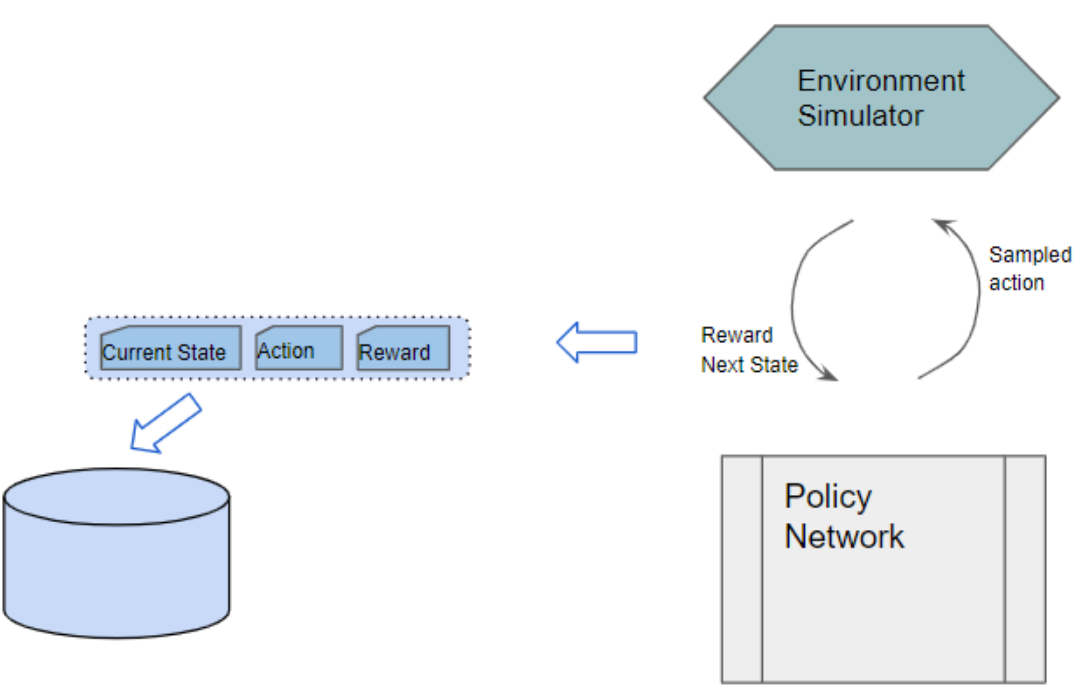

#### (2) second phase: policy network training
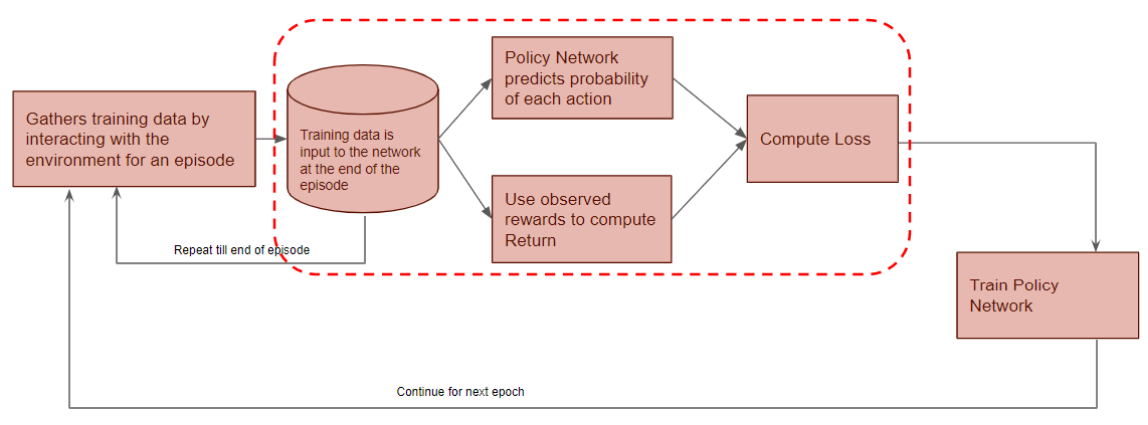
- episode가 끝나면, 저장된 training data가 policy network에 입력된다. network는 데이터 샘플에서 current state와 action을 가져와서, 그 action을 했을 확률을 예측한다:  $\pi(a_t|s_t)$
- 그리고 reward 정보를 가져와서 discounted return을 계산한다.
- 마지막으로, discounted return과 action probability를 사용하여 policy network를 학습시키기 위한 loss를 계산한다.
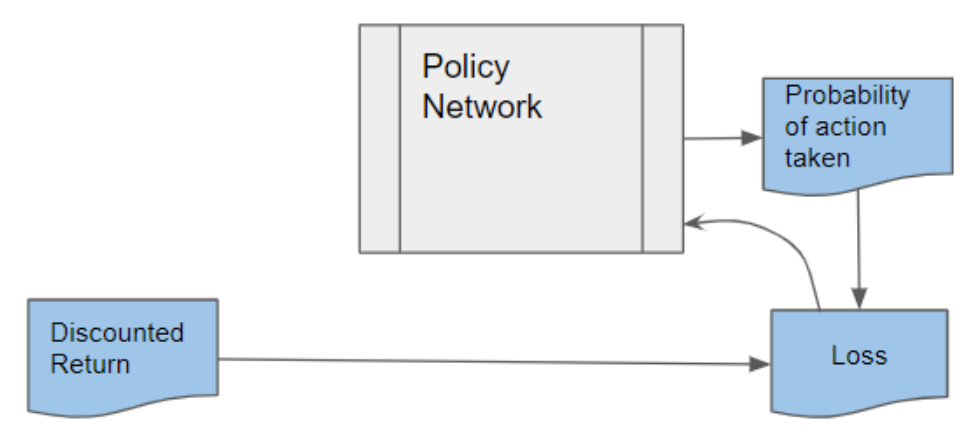
- policy network는 optimal policy를 찾을 때까지 더 나은 action을 예측하도록 학습된다.

### __Policy-based solutions have some advantages over a Value-based solution__


value-based solution(예: DGN)은 state에서 취할 수 있는 모든 actions의 Q-value를 출력하는 value function을 학습한다. 이 방식은 actions의 수가 매우 많은 문제에서는 어려움을 겪을 수 있다.

예를 들어, continuous actions이 있는 경우(예: 로봇이 0도에서 360도 사이의 어떤 각도(예: 0.1도, 0.11도, ...)로든 회전하거나, 팔을 들거나, 고개를 돌리거나, 특정 범위 내의 속도(임의의 실수 값)로 이동하는 등) 결과적으로 actions의 수가 무한대가 되어버린다.

반면에, policy gradient와 같은 policy-based solution은 __actions의 확률분포를 출력하는 policy function을 학습하므로__, actions의 수가 많은 문제도 처리할 수 있다.

즉, policy gradient가 __deterministic policies뿐만 아니라 stochastic policies도 학습할 수 있음을 의미한다.__

항상 단 하나의 best action만 존재하는 것은 아니다. agent는 확률분포에서 샘플링을 통해 action을 선택하므로, 매번 다른 action을 선택할 수 있다.

그러나 value-based solutions에서는 optimal policy가 가장 높은 Q-value를 가진 action을 선택하는 방식으로 유도되므로, 오직 deterministic policies만 학습할 수 있다.

그리고, policy-based methods은 policy를 directly하게 찾기 때문에, 일반적으로 학습 시간 측면에서 value-based methods보다 더 효율적이다.

### __Policy Gradient ensures adequate exploration__

policy gradient는 학습을 진행하면서 자연스럽게 policy를 학습하게 된다.

매 step마다, policy gradient는 예측된 확률분포에서 샘플링을 함으로써 action을 선택하며, 그 결과 agent는 다양한 actions을 취하게 된다.

학습이 막 시작되었을 때는 어떤 action이 더 선호되는지(좋은지) 모르기 때문에, network가 출력하는 actions의 확률분포는 꽤 uniform하다. 이는 모든 actions이 선택될 가능성이 거의 비슷하다는 것을 의미하므로, 자연스럽게 exploration을 장려하게 된다. (더 좋은 action을 찾도록)

학습이 진행됨에 따라, 확률분포는 best action들 쪽으로 수렴하게 되며, 이를 통해 exploitation을 극대화한다. (즉, best actions에만 집중 = 다른 actions은 패스 => 이러한 일관된 행동을 하게 된다)

만약, 어떤 state에 대해 단 하나의 best action만 존재한다면, 그 확률분포는 퇴화분포(degenerate distribution)가 되어 결과적으로 deterministic policy가 된다.
- 퇴화분포: 이산확률변수가 하나의 값을 가질 확률이 1인 분포(즉, 하나의 값만 확률이 1이고 나머지는 0인 분포)

### __Policy Gradient Loss function__


Q-Learning이나 DQN은 예측한 Q-value와 비교할 수 있는 target Q-value가 있기 때문에 loss function을 정의하기가 쉽지만, policy gradient는 예측한 action 확률분포와 비교할 수 있는 정답이 없다.

가지고 있는 정보는 선택된 action이 positive reward로 이어졌는지, negative reward로 이어졌는지 뿐이다.

loss function을 통해 달성하고자 하는 objective는
- 만약 어떤 action이 positive reward로 이어졌다면, 그 action이 더 자주 선택되길(확률 증가),
- 반대로 negative reward로 이어졌다면, 그 action이 덜 선택되도록(확률 감소) 유도해야 한다.

단, positive reward를 받았다고 해서, 그 확률을 1(100%)로 만들고 싶은 것은 아니다. 그렇게 되면 그 action이 "유일하게" 선택되는 action이 되어버리고, 다른 모든 actions의 확률은 0이 되어버리기 때문이다. 반대의 경우도 마찬가지이다.

계속해서 exploration하고 다른 actions을 시도하는 것이 바람직하다. 대신, positive action에 대해서는 그 확률을 약간 높이고(다른 actions의 확률은 약간 낮춰서 확률 합이 1이 되도록), 그 positive action을 조검 더 선호하게 만들어야 한다.

$P(a)$가 action $a$를 선택할 확률이라고 할 때, $a$가 positive action이라면, $P(a)$을 최대화하는 것이 바람직하다.

이때, 딥러닝의 optimizer들은 기본적으로 loss를 최소화하는 방향으로 작동하기 때문에 $1-P(a)$을 loss로 사용할 수 있다. 이 값은 $P(a)$이 1에 가까워질수록 0에 가까워지기 때문에, 결과적으로 network가 $P(a)$을 높이는 방향으로 파라미터를 업데이트하도록 유도할 수 있다. negative action의 경우에도 마찬가지이다.

확률은 부동 소수점 숫자로 표현되는데, underflow/overflow가 발생할 수 있다. 이를 피하기 위해 보통 $-\log(P(a))$을 사용한다. 이 역시 $1-P(a)$과 동일하게 작동하며, 값의 범위가 (0, 1)이 아닌 $(-\infty, 0)$이라는 더 넓은 범위를 갖는다.

추가로, 모든 action에 동일한 가중치를 두는 대신, episode 동안 더 많은 reward를 가져다준 action은 더 큰 가중치를 받아야 한다. 이를 위해 discounted return $R_t$를 loss function에 사용한다: $-\log(P(a)) \times R_t$

$-\log(P(a)) \times R_t$를 통해 선택된 각 action의 확률은 그 action으로 인해 발생한 $R_t$에 비례하여 업데이트된다.

### __Detailed Operation__

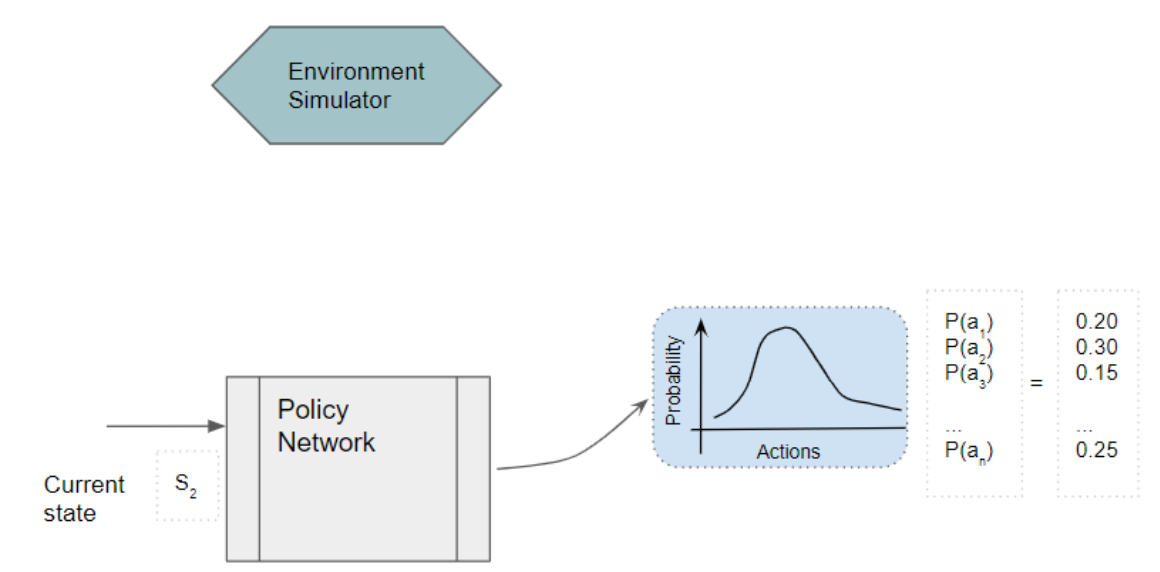
- initial starting state에서, policy network는 current state를 입력으로 받아 모든 actions에 대한 확률분포를 출력한다.
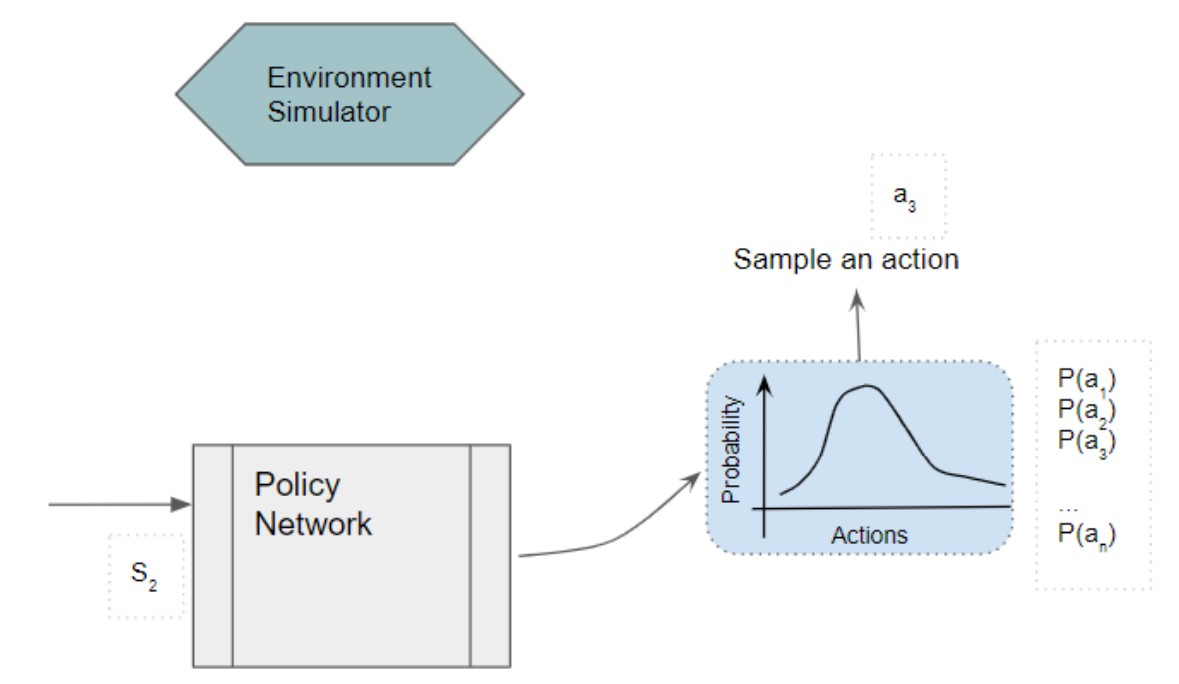
- 그 후, 확률분포에서 샘플링을 통해 action 하나를 선택한다.
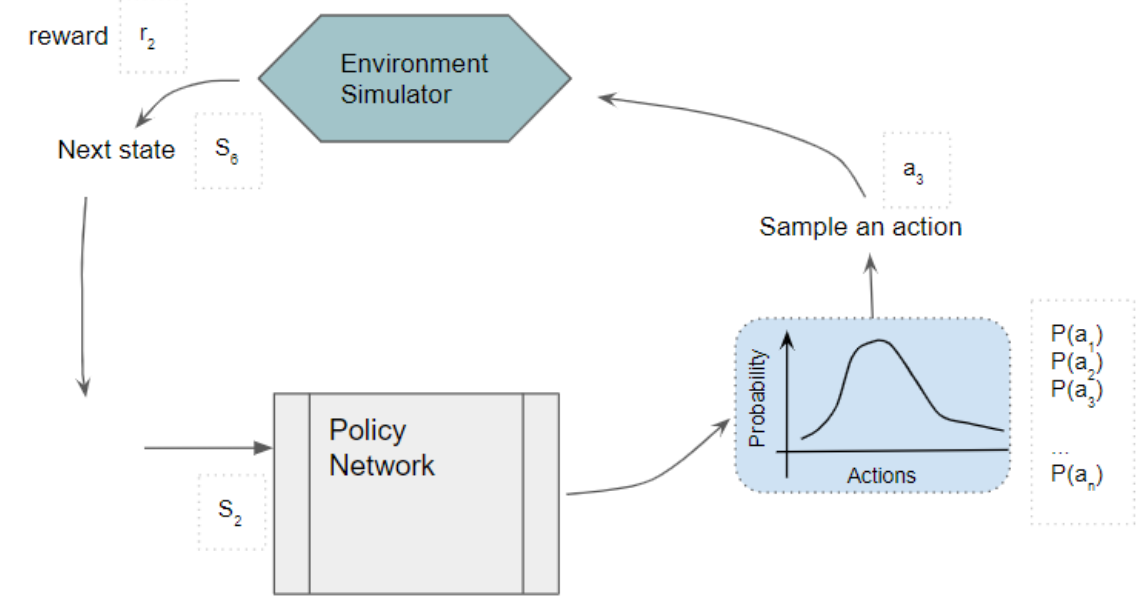
- 선택된 action은 environment에 전달되고, environment은 next state와 reward를 생성한다.
- next state는 다시 policy network로 전달된다.
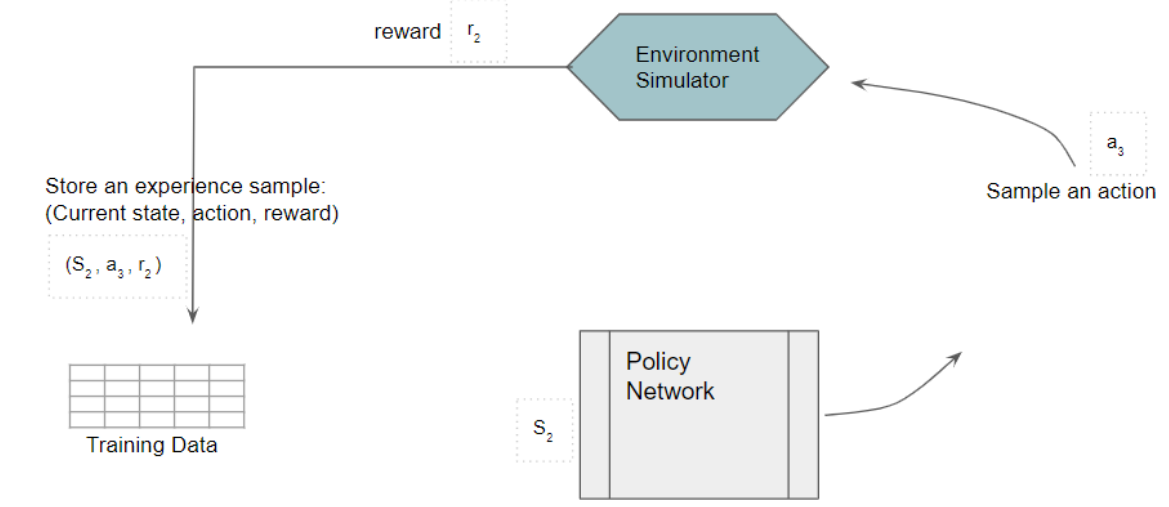
- observed experience의 샘플은 training data로 저장된다.
- 데이터 수집 단계에서는 policy network의 파라미터는 fixed되어 있다.
- episode가 끝날 때까지 이 과정을 계속한다.
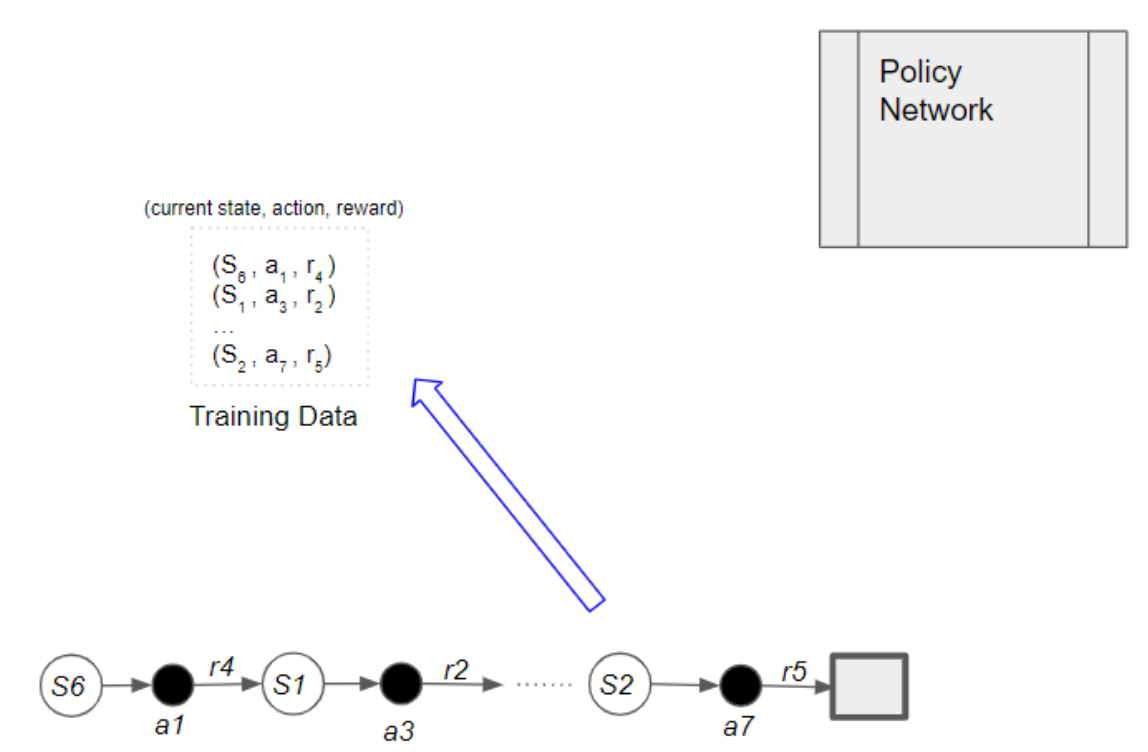
- 그 후, 저장된 training data를 입력으로 사용하여 policy network를 학습시킨다.
- training batch에는 한 episode 분량의 샘플들이 담겨 있다.
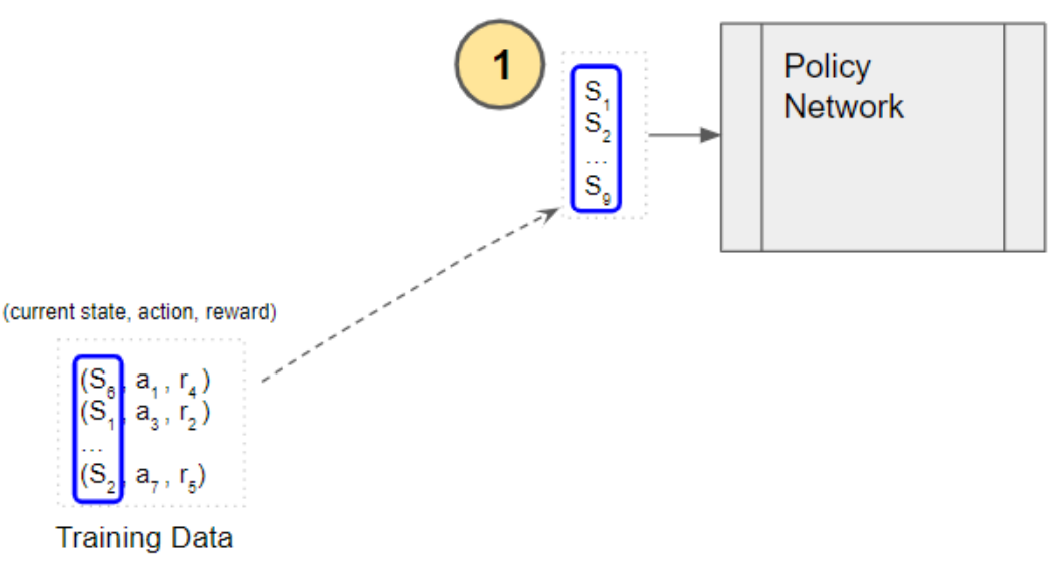
- 각 state들이 policy network에 입력된다.
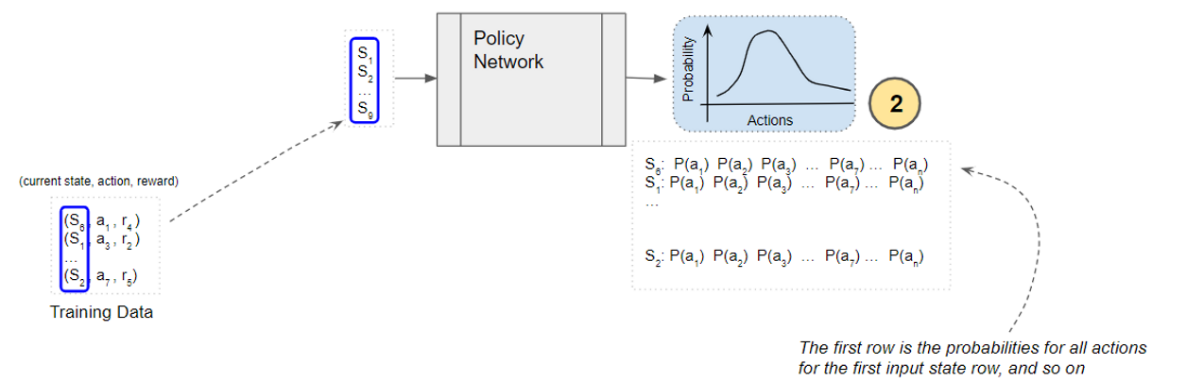
- policy network는 각 state에서 모든 actions에 대한 확률분포를 예측한다.
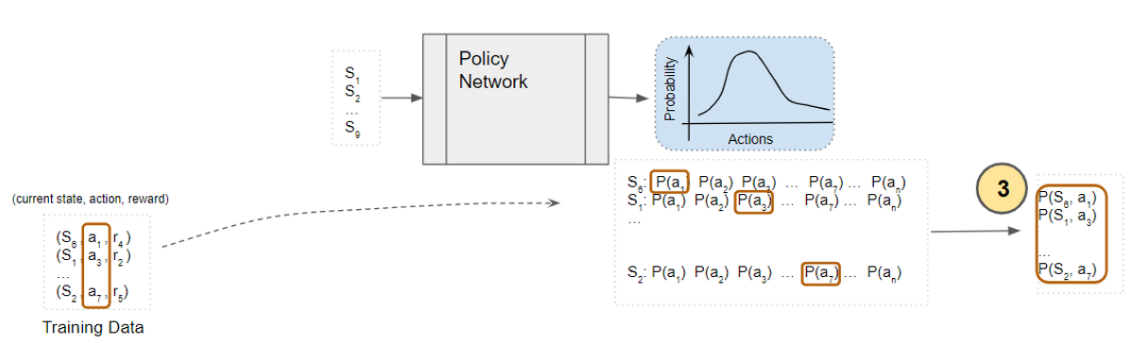
- 그리고 각 state에서 실제로 선택된 action의 확률을 반환한다.
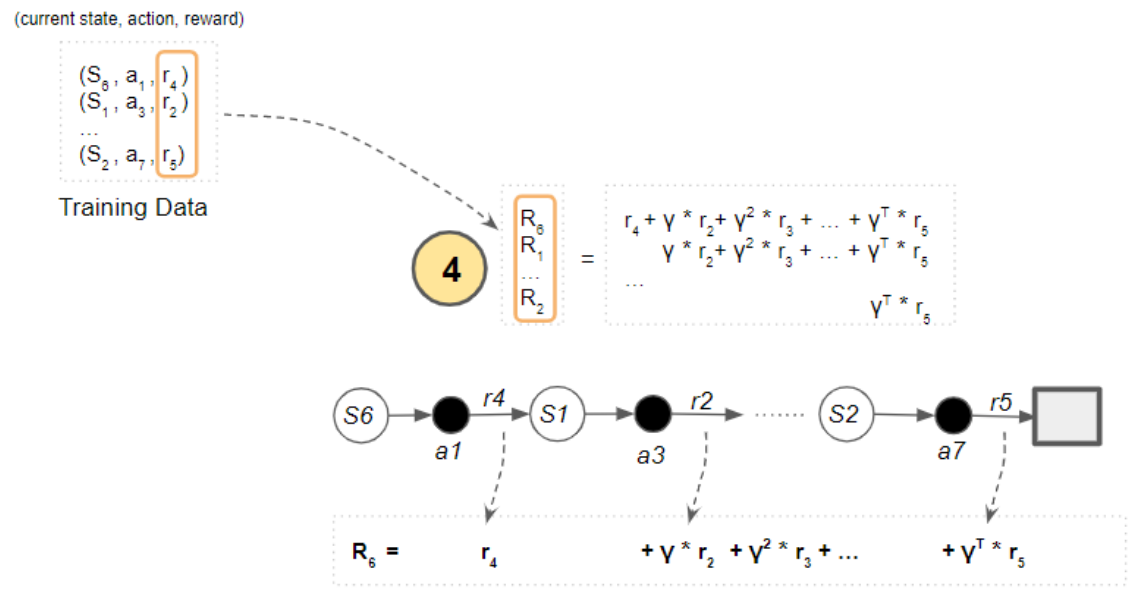
- 각 샘플에 대해 rewards의 가중합으로 discounted return을 계산한다.
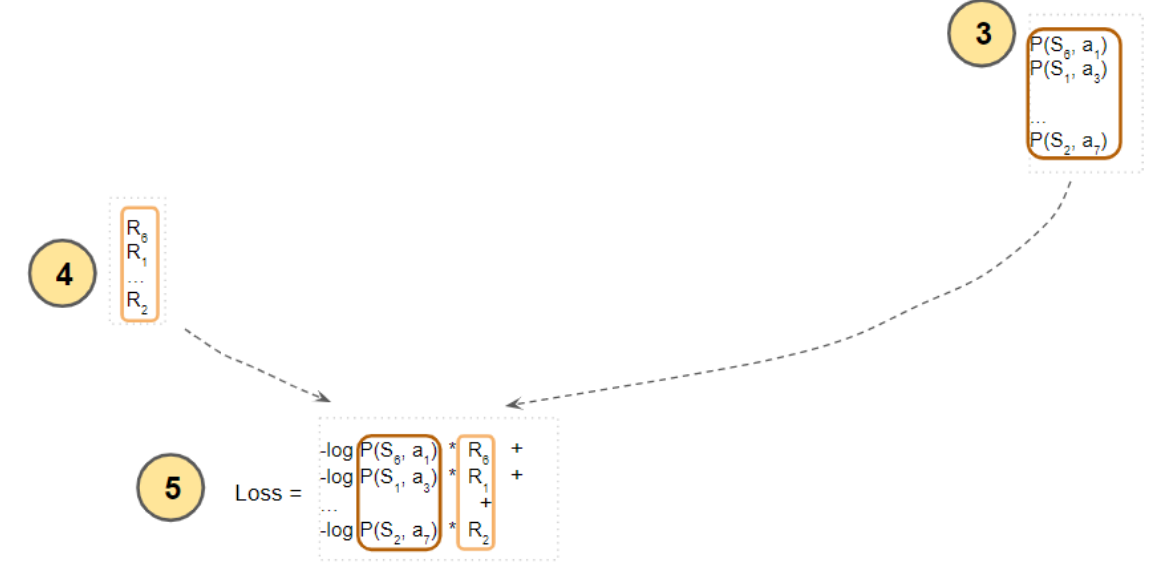
- action 확률의 log 값과 discounted return을 곱한다.
- 이 값을 최대화하는 것이 목표이지만, network는 loss를 최소화하는 방식으로 작동하므로 "-"를 곱한다.
- 모든 states에 대해 이 음수 값들을 더해 loss를 계산한다.
- 이 loss는 policy network를 학습시키는 데 사용된다.
- next epoch에서도 이 사이클이 반복된다.